In [117]:
import os
import pandas as pd
import numpy as np
import math
from datetime import datetime
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import plotly.express as px
from difflib import SequenceMatcher

In [118]:
from platform import python_version
print(python_version())

3.8.8


### Recuperando datos

In [165]:
# Reclamos
file_name = 'data/pre_processed_2_sbs.csv'
datos_preprocessed = pd.read_pickle(file_name)

In [166]:
datos_preprocessed.columns

Index(['N° Reclamo', 'Nombre', 'N° Docum.', 'Servicio', 'Cod Motivo', 'Motivo',
       'Cod. Atm', 'Det. AtmError', 'N° Cajero', 'Monto', 'Operac.',
       'Present.', 'Resul.', 'Recl.', 'Cod. Oficina', 'Det. Oficina',
       'Regional', 'Dependencia', 'Cod. Deriv', 'Última Derivació',
       'N° Memo Carta Resp.', 'Dirección Domic.', 'Fase del Reclamo',
       'Proceso', 'Días de Demora', ' de Demora', 'Respon', 'Responsable',
       'Macroregión', 'Resp.', 'División', 'División Responsable', 'Cod. Dept',
       'Responsable.1', 'Mes Presentacion', 'Días Reclamo', 'Año Presentación',
       'Semáforo', 'Situación', 'Cod. Usuario', 'Nombre Usuario',
       'Descripción Fase', 'Canal Ingreso', 'Medio Respuesta',
       'Reclamo/requerim', 'Hace carta', 'Correo', 'Cta. Ahorro',
       'Descripcion', 'Motivo.1', 'DEPARTAMEN', 'PROVINCIA', 'DISTRITO',
       'IS_LIMA', 'fecha_fase1', 'fecha_fase2', 'fecha_fase3', 'fecha_fase4',
       'fecha_fase5', 'fecha_fase6', 'fecha_fase7', 'Cod Servi

In [167]:
# Trimestres
#datos_preprocessed['Trimestre'] = str(datos_preprocessed['fecha_fase1'].dt.year)+'-'+str(datos_preprocessed['fecha_fase1'].dt.quarter)
datos_preprocessed['Trimestre'] = datos_preprocessed['fecha_fase1'].apply(lambda x: str(x.year)+'-'+str(x.quarter))

<AxesSubplot:xlabel='Trimestre'>

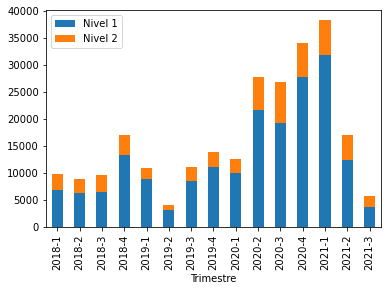

In [168]:
data_temp = datos_preprocessed.groupby(['Trimestre','Nivel']).agg({'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
data_temp.set_index("Trimestre", inplace = True)

nivel1 = data_temp[data_temp['Nivel']=='1er'][['N° Reclamo']]
nivel1.columns = ['Nivel 1']
nivel2 = data_temp[data_temp['Nivel']!='1er'][['N° Reclamo']]
nivel2.columns = ['Nivel 2']
data_temp = pd.merge(nivel1, nivel2, on="Trimestre")

data_temp.head()
data_temp.plot(kind="bar", stacked=True)

In [169]:
datos_preprocessed = datos_preprocessed[datos_preprocessed['Nivel']=='1er'].reset_index(drop=True)
datos_preprocessed.head()

,N° Reclamo,Nombre,N° Docum.,Servicio,Cod Motivo,Motivo,Cod. Atm,Det. AtmError,N° Cajero,Monto,...,Cod Servicio,Cod Motivo SBS,Motivo Corregido,Cod Servicio SBS,Servicio Corregido,Nivel,Tipo,Motivo_name_SBS,Servicio_name_SBS,Trimestre
0,023818-7,TORRES SENMACHE PATHY PAMELA,41114765,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,"Incumplimiento De Clausulas De los Contratos,P...",No identificado,2018-3
1,002718-4016,CARLOS RIQUELME ROMAN,43471167,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,"Incumplimiento De Clausulas De los Contratos,P...",No identificado,2018-3
2,002719-6276,RICARDO ARTURO RIVERA NUÑEZ,30831857,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,892.74,...,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,"Incumplimiento De Clausulas De los Contratos,P...",No identificado,2019-4
3,010119-356,VERAMENDI ANCASI JAVIER,09952556,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,8000,...,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,"Incumplimiento De Clausulas De los Contratos,P...",No identificado,2019-4
4,010119-354,MEDINA RAMOS JOSE LUIS,29353518,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,"Incumplimiento De Clausulas De los Contratos,P...",No identificado,2019-4


<AxesSubplot:xlabel='Trimestre'>

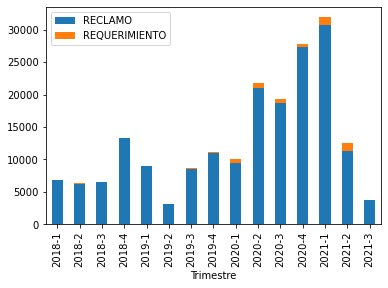

In [170]:
data_temp = datos_preprocessed.groupby(['Trimestre','Reclamo/requerim']).agg({'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
data_temp.set_index("Trimestre", inplace = True)

counter = 0
data_df = pd.DataFrame()
for i in data_temp['Reclamo/requerim'].unique():
    temp_df = data_temp[data_temp['Reclamo/requerim']==i][['N° Reclamo']]
    temp_df.columns = [i]
    if counter == 0:
        data_df = temp_df
    else:
        data_df = pd.merge(data_df, temp_df, on="Trimestre")
    counter+=1


data_df.head()
data_df.plot(kind="bar", stacked=True)

In [150]:
data_df = data_temp.reset_index()
data_df

,Trimestre,Reclamo/requerim,N° Reclamo
0,2018-1,RECLAMO,6837
1,2018-1,REQUERIMIENTO,58
2,2018-2,RECLAMO,6272
3,2018-2,REQUERIMIENTO,61
4,2018-3,RECLAMO,6464
5,2018-3,REQUERIMIENTO,62
6,2018-4,RECLAMO,13224
7,2018-4,REQUERIMIENTO,106
8,2019-1,RECLAMO,8949
9,2019-1,REQUERIMIENTO,37


<AxesSubplot:xlabel='Trimestre'>

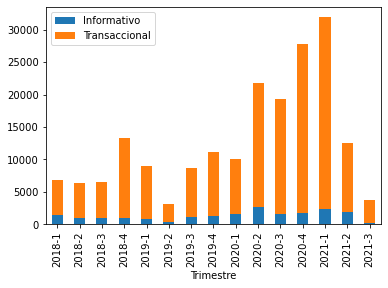

In [123]:
data_temp = datos_preprocessed.groupby(['Trimestre','Tipo']).agg({'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
data_temp.set_index("Trimestre", inplace = True)

counter = 0
data_df = pd.DataFrame()
for i in data_temp.Tipo.unique():
    temp_df = data_temp[data_temp['Tipo']==i][['N° Reclamo']]
    temp_df.columns = [i]
    if counter == 0:
        data_df = temp_df
    else:
        data_df = pd.merge(data_df, temp_df, on="Trimestre")
    counter+=1


data_df.head()
data_df.plot(kind="bar", stacked=True)

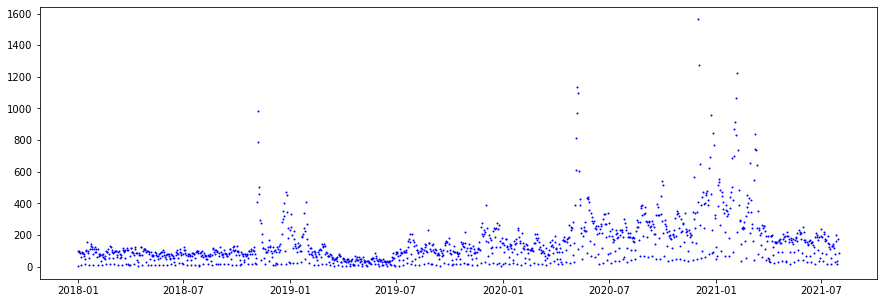

In [124]:
data_temp = datos_preprocessed.groupby(['fecha_fase1']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo']).reset_index()
data_temp
fig = plt.figure(figsize = (15, 5))
plt.scatter(data_temp['fecha_fase1'], data_temp['N° Reclamo'], s =1, c = 'blue')

In [184]:
data_temp = datos_preprocessed.groupby(['Canal Ingreso']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Canal Ingreso'], values='N° Reclamo',
                  color='N° Reclamo', hover_data=['Canal Ingreso'])
fig.show()

# Usar diagrama Pie

In [185]:
total = np.sum(data_temp['N° Reclamo'])
data_temp['per'] = data_temp['N° Reclamo']/total*100

data_temp.to_excel("canal_pie.xlsx") 
fig = px.pie(data_temp, values='per', names='Canal Ingreso', title='Porcentage por Canal Ingreso')
fig.show()

In [180]:
data_temp = datos_preprocessed.groupby(['Cod Motivo SBS']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Cod Motivo SBS'], values='N° Reclamo',
                  color='N° Reclamo', hover_data=['Cod Motivo SBS'])
fig.show()

In [181]:
data_temp = datos_preprocessed.groupby(['Motivo Corregido']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

total = np.sum(data_temp['N° Reclamo'])
data_temp['per'] = data_temp['N° Reclamo']/total*100
data_temp = data_temp.sort_values(by=['per'], ascending = False)

# fig = px.pie(data_temp, values='per', names='Cod Motivo SBS', title='Porcentage por Motivo')
# fig.show()

data_temp['motivo'] = data_temp.apply(lambda x: x['Motivo Corregido'] if x['per'] >= 2 else 'Otros', axis=1)
data_temp = data_temp.groupby(['motivo']).agg({ 'per': "sum"}).reset_index()

data_temp.to_excel("motivos_pie.xlsx")

fig = px.pie(data_temp, values='per', names='motivo', title='Porcentaje por Motivo')
fig.show()

In [182]:
data_temp = datos_preprocessed.groupby(['Cod Servicio SBS']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Cod Servicio SBS'], values='N° Reclamo',
                  color='N° Reclamo', hover_data=['Cod Servicio SBS'])
fig.show()

# Diagrama pie

In [183]:
data_temp = datos_preprocessed.groupby(['Servicio Corregido']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

total = np.sum(data_temp['N° Reclamo'])
data_temp['per'] = data_temp['N° Reclamo']/total*100
data_temp = data_temp.sort_values(by=['per'], ascending = False)

data_temp['servicio'] = data_temp.apply(lambda x: x['Servicio Corregido'] if x['per'] >= 2 else 'Otros', axis=1)
data_temp = data_temp.groupby(['servicio']).agg({ 'per': "sum"}).reset_index()

data_temp
data_temp.to_excel("servicio_pie.xlsx")
fig = px.pie(data_temp, values='per', names='servicio', title='Porcentaje por Servicio')
fig.show()

In [49]:
total = np.sum(data_temp['N° Reclamo'])
data_temp['per'] = data_temp['N° Reclamo']/total*100

fig = px.pie(data_temp, values='per', names='Cod Servicio SBS', title='Percentage of type services')
fig.show()

In [29]:
data_temp = datos_preprocessed.groupby(['Cod Servicio SBS','Cod Motivo SBS']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Cod Servicio SBS','Cod Motivo SBS'], values='N° Reclamo',
                  color='N° Reclamo', hover_data=['Cod Servicio SBS','Cod Motivo SBS'])
fig.show()

In [30]:
data_temp = datos_preprocessed.groupby(['Cod Motivo SBS','Cod Servicio SBS']).agg({ 'N° Reclamo': "count"})
data_temp = data_temp.sort_values(by=['N° Reclamo'], ascending = False).reset_index()

fig = px.treemap(data_temp, path=[px.Constant('Codigo de reclamo'),'Cod Motivo SBS','Cod Servicio SBS'], values='N° Reclamo',
                  color='N° Reclamo', hover_data=['Cod Motivo SBS','Cod Servicio SBS'])
fig.show()

In [ ]:
# data_temp = datos_preprocessed.groupby(['Trimestre','Nivel','Reclamo/requerim']).agg({'N° Reclamo': "count"})
# data_temp = data_temp.sort_values(by=['Trimestre']).reset_index()
# data_temp.head()

In [6]:
datos_preprocessed.head()

,N° Reclamo,Nombre,N° Docum.,Servicio,Cod Motivo,Motivo,Cod. Atm,Det. AtmError,N° Cajero,Monto,...,fecha_fase6,fecha_fase7,Cod Servicio,Cod Motivo SBS,Motivo Corregido,Cod Servicio SBS,Servicio Corregido,Nivel,Tipo,Trimestre
0,023818-7,TORRES SENMACHE PATHY PAMELA,41114765,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,2018-10-03,2018-10-03,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,2018-3
1,002718-4016,CARLOS RIQUELME ROMAN,43471167,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,2018-09-26,2018-09-26,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,2018-3
2,002719-6276,RICARDO ARTURO RIVERA NUÑEZ,30831857,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,892.74,...,2020-02-10,2020-02-11,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,2019-4
3,010119-356,VERAMENDI ANCASI JAVIER,09952556,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,8000,...,2019-12-20,2019-12-20,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,2019-4
4,010119-354,MEDINA RAMOS JOSE LUIS,29353518,CUENTA DE AHORRO,10000,ICCC - INCUMPLIMIENTO DE CLAUSULAS DEL CONTRAT...,NaN,NaN,NaN,NaN,...,2019-11-12,2019-11-12,100,1,"INCUMPLIMIENTO DE CLAUSULAS DE LOS CONTRATOS, ...",102,CUENTA DE AHORRO (DESTINADA A DEPÓSITO DE REMU...,1er,Informativo,2019-4


In [27]:
data_temp = data_lima_m.groupby(['DISTRICT',DIAGNOSIS_PARAMETER]).agg({ 'QTY_PEOPLE_SERVED': "sum"})
data_temp = data_temp.reset_index()
data_temp = data_temp.groupby(['DISTRICT']).agg({ DIAGNOSIS_PARAMETER: "count"})
data_temp = data_temp.reset_index()

fig = px.treemap(data_temp,
                 path=[px.Constant('DISTRICTS'),'DISTRICT'],
                 values=DIAGNOSIS_PARAMETER,
                 color=DIAGNOSIS_PARAMETER,
                 hover_data=['DISTRICT'])
fig.show()

NameError: name 'data_lima_m' is not defined

In [ ]:
datos_preprocessed['fecha_fase1'].dt.year

In [ ]:
datos_preprocessed['fecha_fase1'].dt.quarter

#### Recuperando codigos SBS